# CALIDAD DE DATOS

## SET UP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

## Importar datos

In [2]:
# Creación de conexión a base de datos SQLite
con = sa.create_engine('sqlite:///Datos/airbnb.db')

Para un caso donde no tuvieramos la documentación de la base de datos, podríamos consultar las tablas que contiene a través de la siguiente manera:

In [3]:
# Inspección de tablas en la base de datos
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['listings', 'listings_det']

In [4]:
# Carga de datos desde la base de datos
listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

In [5]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.46,-3.68,Private room,60,1,80,2019-05-14,1.21,2,180,4,None
1,1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40,-3.74,Private room,31,4,33,2018-05-29,0.39,2,364,0,None
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.39,-3.70,Entire home/apt,50,15,0,None,NaN,5,222,0,None
3,3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42,-3.71,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,None
4,4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.39,-3.69,Private room,26,2,149,2018-05-15,1.65,1,349,0,None


In [6]:
listings_det.head()

,index,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,None,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.89,4.77,4.85,None,f,2,0,2,0,1.21
1,1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,None,f,2,0,2,0,0.39
2,2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,...,NaN,NaN,NaN,None,f,5,4,1,0,NaN
3,3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,None,f,1,1,0,0,0.51
4,4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.71,4.70,4.72,None,f,1,0,1,0,1.65


## Datos externos

En nuestros datos no tenemos el precio de compra de un inmueble. Por tanto vamos introducirlos de forma externa mediante el archivo "idealista.csv"

In [7]:
pd.read_csv('Datos/idealista.csv')

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 7,icon-elbow,icon-elbow href
0,Madrid,3.683 €/m2,"- 0,7 %","- 2,0 %","+ 0,9 %","- 3,6 %",NaN,NaN
1,4.085 €/m2,4.096 €/m2 jul 2019,"- 0,3 %","+ 4,5 %","+ 0,4 %","+ 2,1 %",Arganzuela,https://www.idealista.com/sala-de-prensa/infor...
2,3.409 €/m2,3.663 €/m2 mar 2009,"- 6,9 %","+ 7,4 %","+ 1,8 %","+ 5,7 %",Barajas,https://www.idealista.com/sala-de-prensa/infor...
3,2.123 €/m2,"0,0 %","- 0,5 %","- 2,3 %",NaN,"- 33,1 %",Carabanchel,https://www.idealista.com/sala-de-prensa/infor...
4,4.827 €/m2,5.096 €/m2 ene 2020,"- 1,7 %","- 5,3 %","+ 0,5 %","+ 0,7 %",Centro,https://www.idealista.com/sala-de-prensa/infor...
5,5.098 €/m2,5.216 €/m2 nov 2018,"- 0,2 %","- 0,7 %","+ 1,2 %","- 2,3 %",Chamartín,https://www.idealista.com/sala-de-prensa/infor...
6,5.381 €/m2,5.432 €/m2 mayo 2020,"- 0,9 %","+ 0,9 %","+ 0,2 %","+ 0,6 %",Chamberí,https://www.idealista.com/sala-de-prensa/infor...
7,2.940 €/m2,3.578 €/m2 oct 2007,"- 0,2 %","- 2,1 %","- 17,8 %","- 0,3 %",Ciudad Lineal,https://www.idealista.com/sala-de-prensa/infor...
8,3.568 €/m2,3.726 €/m2 mayo 2008,"- 4,3 %","+ 2,0 %","+ 0,5 %","+ 1,8 %",Fuencarral,https://www.idealista.com/sala-de-prensa/infor...
9,3.871 €/m2,3.901 €/m2 sep 2021,"- 0,8 %","- 0,8 %","+ 1,5 %","+ 8,1 %",Hortaleza,https://www.idealista.com/sala-de-prensa/infor...


De esta tabla nos quedaremos con la columna "table_cell" = precios_m2 y con "icon-elbow" = distrito

In [8]:
precio_m2 = pd.read_csv('Datos/idealista.csv').loc[1:,['table__cell','icon-elbow']]\
    .rename(columns= {'table__cell':'precio_m2', 'icon-elbow':'distrito'})

In [9]:
precio_m2['precio_m2'] = precio_m2.precio_m2.str.split(expand=True)[0].str.replace('.','',).astype(float)
precio_m2

,precio_m2,distrito
1,4085.00,Arganzuela
2,3409.00,Barajas
3,2123.00,Carabanchel
4,4827.00,Centro
5,5098.00,Chamartín
6,5381.00,Chamberí
7,2940.00,Ciudad Lineal
8,3568.00,Fuencarral
9,3871.00,Hortaleza
10,2267.00,Latina


In [10]:
precio_m2

,precio_m2,distrito
1,4085.00,Arganzuela
2,3409.00,Barajas
3,2123.00,Carabanchel
4,4827.00,Centro
5,5098.00,Chamartín
6,5381.00,Chamberí
7,2940.00,Ciudad Lineal
8,3568.00,Fuencarral
9,3871.00,Hortaleza
10,2267.00,Latina


## Tabla `listings`  

In [11]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.46,-3.68,Private room,60,1,80,2019-05-14,1.21,2,180,4,None
1,1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40,-3.74,Private room,31,4,33,2018-05-29,0.39,2,364,0,None
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.39,-3.70,Entire home/apt,50,15,0,None,NaN,5,222,0,None
3,3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42,-3.71,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,None
4,4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.39,-3.69,Private room,26,2,149,2018-05-15,1.65,1,349,0,None


In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           18909 non-null  int64  
 1   id                              18909 non-null  int64  
 2   name                            18906 non-null  object 
 3   host_id                         18909 non-null  int64  
 4   host_name                       18883 non-null  object 
 5   neighbourhood_group             18909 non-null  object 
 6   neighbourhood                   18909 non-null  object 
 7   latitude                        18909 non-null  float64
 8   longitude                       18909 non-null  float64
 9   room_type                       18909 non-null  object 
 10  price                           18909 non-null  int64  
 11  minimum_nights                  18909 non-null  int64  
 12  number_of_reviews               

### Variables y tipos

Eliminamos las variables que no vamos a utilizar en nuetro proyecto

In [13]:
a_eliminar = ['index',
              'host_name', 
              'number_of_reviews', 
              'last_review', 
              'reviews_per_month',
              'license',
              'number_of_reviews_ltm']

In [14]:
listings.drop(columns = a_eliminar, inplace=True)

In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   neighbourhood_group             18909 non-null  object 
 4   neighbourhood                   18909 non-null  object 
 5   latitude                        18909 non-null  float64
 6   longitude                       18909 non-null  float64
 7   room_type                       18909 non-null  object 
 8   price                           18909 non-null  int64  
 9   minimum_nights                  18909 non-null  int64  
 10  calculated_host_listings_count  18909 non-null  int64  
 11  availability_365                18909 non-null  int64  
dtypes: float64(2), int64(6), object(

In [16]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: count, dtype: int64

In [17]:
listings.neighbourhood.value_counts()

neighbourhood
Embajadores    2255
Universidad    1772
Palacio        1533
Sol            1126
Justicia        910
               ... 
El Plantío        5
Valdemarín        4
El Pardo          3
Horcajo           2
Atalaya           1
Name: count, Length: 128, dtype: int64

In [18]:
listings.room_type.value_counts()

room_type
Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: count, dtype: int64

- Convertimos las variables **objeto** `neighbourhood_group`, `neighbourhood`, y `room_type` a **categorical**.

In [19]:
for variable in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    listings[variable] = listings[variable].astype('category')

In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

### Análisis de nulos

Con el `.info()`podemos observar que solo la columna `name` dispone de nulos, concretamente 3 nulos.

In [21]:
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41,-3.71,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.44,-3.63,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.43,-3.71,Entire home/apt,65,3,1,0


No realizamos nada con estos nulos ya que no supone un problema para el desarrollo del caso

### Análisis de duplicados

In [22]:
listings.duplicated().sum()

np.int64(0)

### Análisis de las variables categóricas

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

In [24]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: count, dtype: int64

In [25]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Centro                   8433
Salamanca                1267
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    656
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: count, dtype: int64

In [26]:
listings.room_type.value_counts()

room_type
Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: count, dtype: int64

Observamos que se incluyen hoteles. Para este caso no se plantea comprar hoteles, así que tenemos que eliminar estos registros.

In [27]:
listings = listings.loc[listings.room_type != 'Hotel room']

In [28]:
listings.room_type.value_counts()  

room_type
Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room             0
Name: count, dtype: int64

### Análisis de las variables numéricas

In [29]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18746 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18746 non-null  int64   
 1   name                            18743 non-null  object  
 2   host_id                         18746 non-null  int64   
 3   neighbourhood_group             18746 non-null  category
 4   neighbourhood                   18746 non-null  category
 5   latitude                        18746 non-null  float64 
 6   longitude                       18746 non-null  float64 
 7   room_type                       18746 non-null  category
 8   price                           18746 non-null  int64   
 9   minimum_nights                  18746 non-null  int64   
 10  calculated_host_listings_count  18746 non-null  int64   
 11  availability_365                18746 non-null  int64   
dtypes: category(3), float64

In [30]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.00,129.27,432.38,8.00,36.00,64.00,105.00,9999.00
minimum_nights,18746.00,7.30,35.43,1.00,1.00,2.00,3.00,1125.00
calculated_host_listings_count,18746.00,10.73,26.43,1.00,1.00,2.00,6.00,194.00
availability_365,18746.00,153.76,140.36,0.00,0.00,113.00,310.00,365.00


**Observaciones**:
- `price`, revisar su **min** y **max**.
- `minimum_nights`, revisar **otuliers**
- `calculated_host_listings_count`, revisar **otuliers**

#### `price`

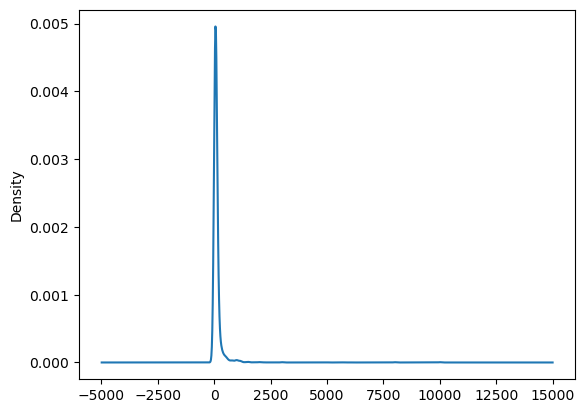

In [31]:
listings.price.plot.kde();

Revisamos los máximos de `price`

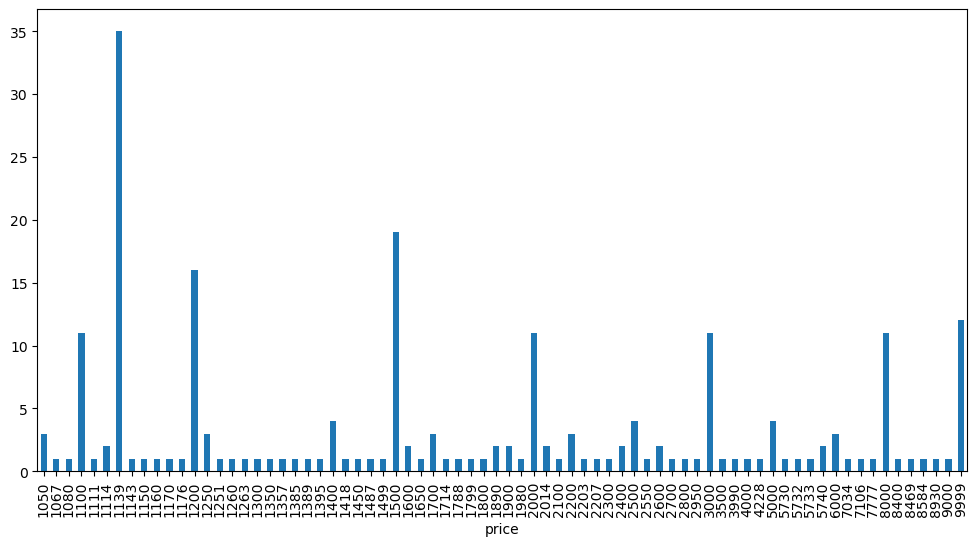

In [32]:
listings.loc[listings.price > 1000].price.value_counts().sort_index().plot.bar(figsize=(12,6));

**Observaciones:**
- No se observan feceuncias muy distintas.
- Se podría considerar el valor 9999 como nulo, pero como su valor en frecuencia no dista mucho de 8000 el cual podría ser un valor válido para una propiedad en el centro de Madrid.
- *No se realizarán modificacaciones*

Revisión de los valores cercanos a cero de `price`

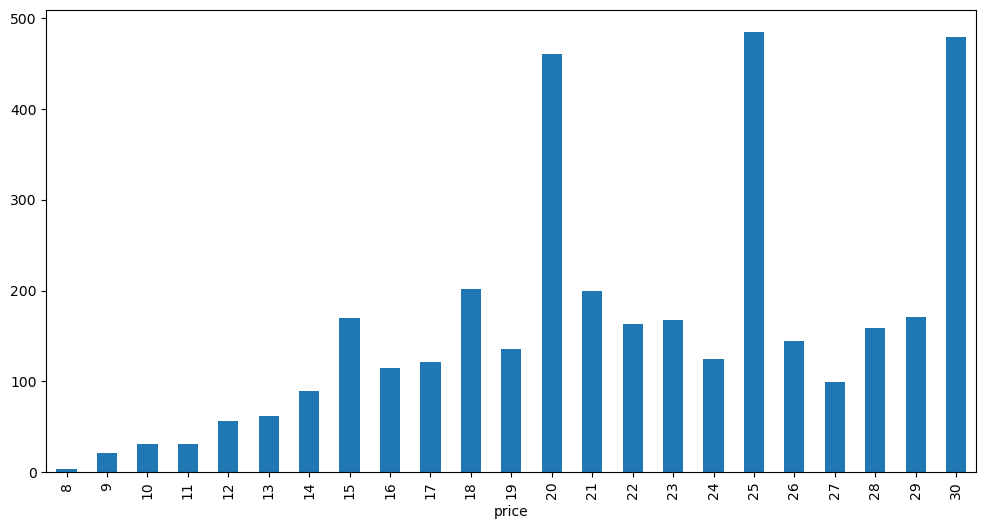

In [33]:
listings.loc[listings.price <= 30].price.value_counts().sort_index().plot.bar(figsize=(12,6));

**Observaciones:**
- Se aprecia un pico en **20€/noche**, y parece que por debajo de esa cantidad sería díficil obtener rentabilidad.
- Se descartan los inmuebles por debajo de los 20€/noche.

In [34]:
listings = listings.loc[listings.price > 19]

#### `minimum_nights`

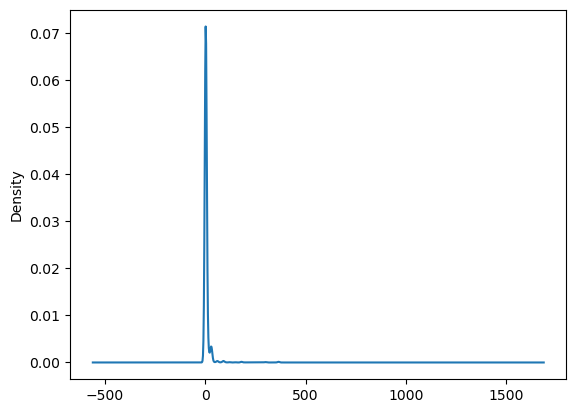

In [35]:
listings.minimum_nights.plot.kde(); 

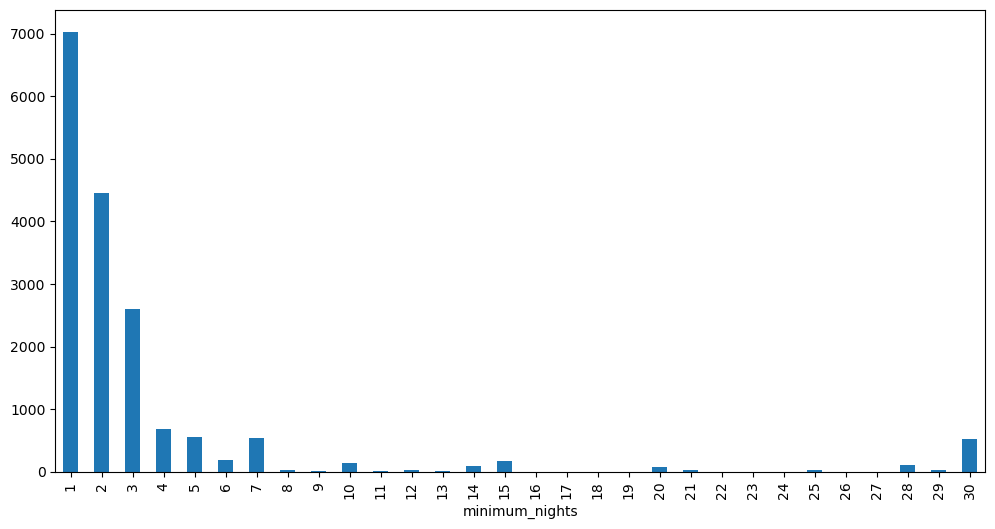

In [36]:
listings.loc[listings.minimum_nights <= 30].minimum_nights.value_counts().sort_index().plot.bar(figsize=(12,6));

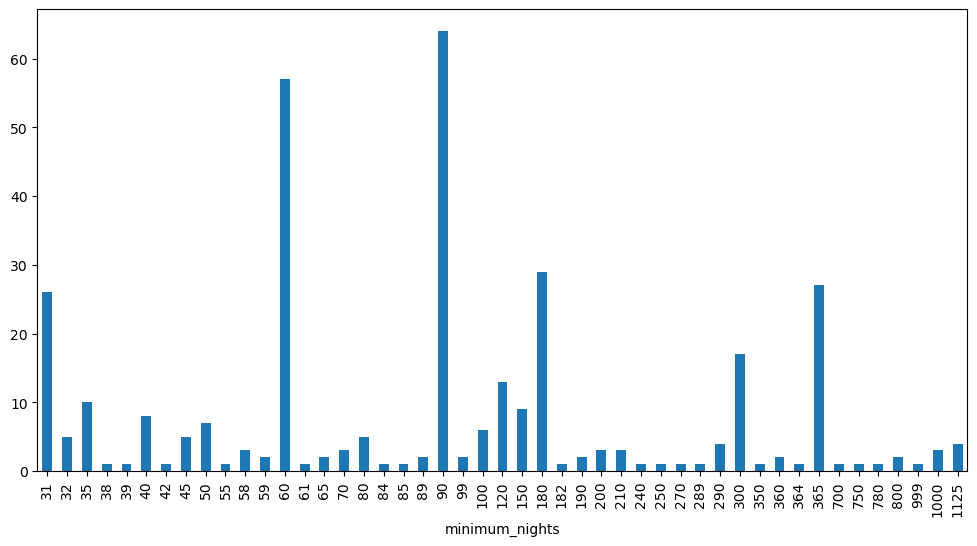

In [37]:
listings.loc[listings.minimum_nights > 30].minimum_nights.value_counts().sort_index().plot.bar(figsize=(12,6));

**Obervaciones**:
- **Concentración en valores bajos:** La mayoría de listados tienen un mínimo de noches muy bajo (concentrados en 1-7 noches).
- **Cola larga hacia la derecha:** Existe una concentración significativa de outliers con valores muy altos (más de 30 noches), lo que sugiere algunos inmuebles requieren estancias mínimas largas.

No se realizará modificaciones sobre esta variable

#### `calculated_host_listings_count`

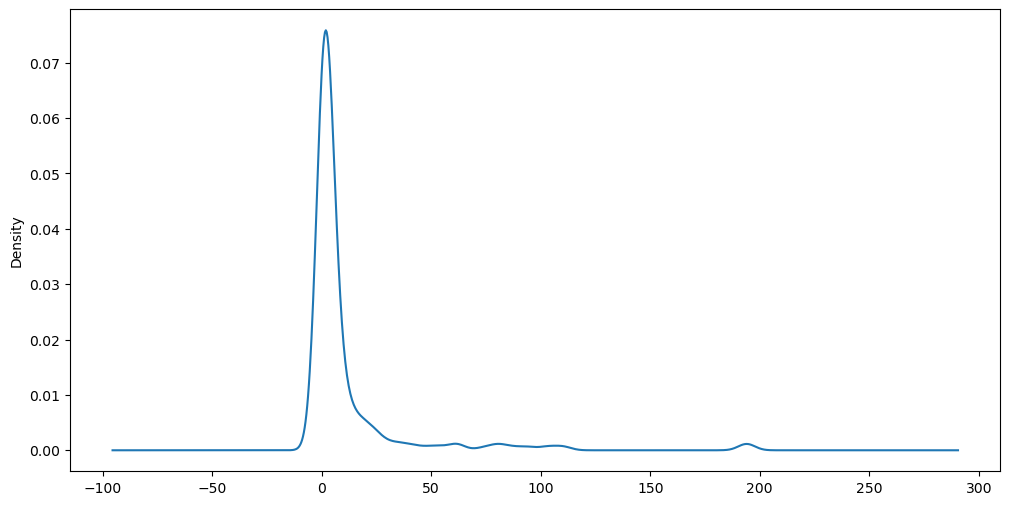

In [38]:
listings.calculated_host_listings_count.plot.kde(figsize=(12,6));

In [39]:
listings.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1      8125
2      2249
3      1210
4       727
5       519
6       426
7       328
8       327
9       279
15      224
194     194
10      189
11      174
19      154
12      150
20      132
22      132
62      124
110     110
13      109
14      106
35      105
26      104
103     103
94       94
25       86
87       83
81       81
80       80
18       76
17       74
74       74
21       66
61       61
30       59
55       55
27       54
52       52
49       49
16       48
44       44
41       41
24       40
40       40
23       39
38       38
33       33
31       31
46       12
Name: count, dtype: int64

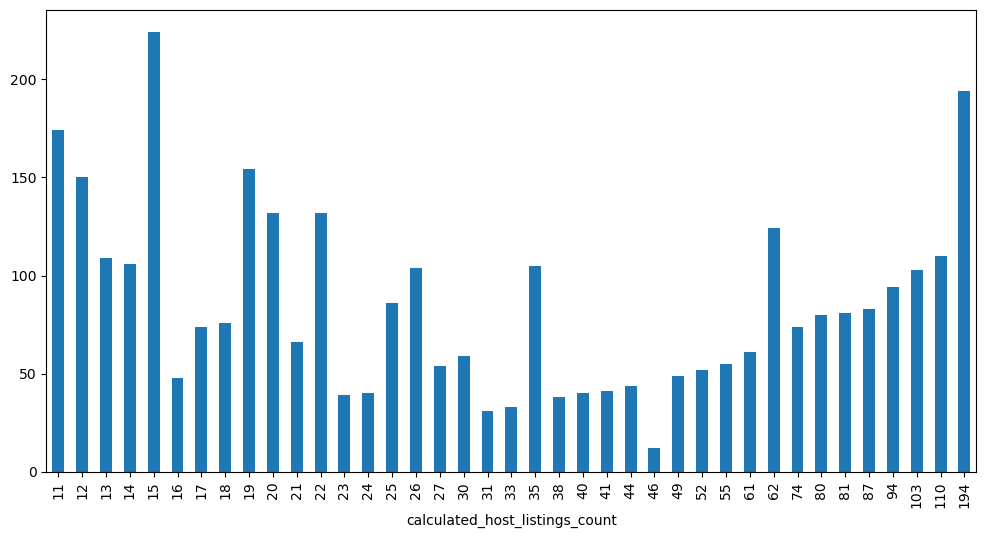

In [40]:
listings.loc[listings.calculated_host_listings_count > 10].calculated_host_listings_count.value_counts().sort_index().plot.bar(figsize=(12,6));

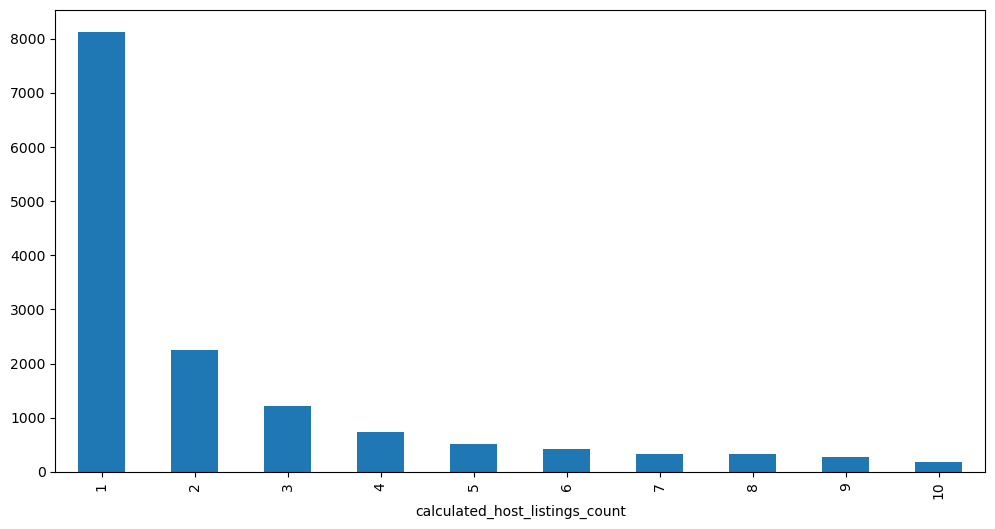

In [41]:
listings.loc[listings.calculated_host_listings_count <= 10].calculated_host_listings_count.value_counts().sort_index().plot.bar(figsize=(12,6));

**Observaciones**
- Se puede apreciar que la mayoría son propietarios con 1 sola propiedad.
- La distribución está concentrada principalmente en valores bajos, indicando la presencia de propietarios únicos y pequeños inversores.
- Existen propietarios con > 10 propiedades lo que se prodría considerar operadores profesionales/empresas de gestión inmobiliaria. Representan una minoría de anfitriones pero controlan muchas propiedades

No se realizarán modificaciones sobre esta variable ya que no se consideran outliers.

💡 En caso de necesitar un mayor análisis, se podría segmentar esta variable en 'Único propietario', 'Pequeño operador', 'Operador profesional', para analizar con mayor detenimiento en que tipo de propiedades está invirtiendo la competencia.

## Tabla `listings_det`

In [42]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

### Variables y tipos

Se seleccionan solo aquellas variables que aporten información relevante y no estén incluidas en la tabla `listigns`.

In [43]:
incluir = ['id',
           'description',
           'host_is_superhost',
           'accommodates',
           'bathrooms',
           'bedrooms',
           'beds',
           'number_of_reviews',
           'review_scores_rating',
           'review_scores_communication',
           'review_scores_location']

In [44]:
listings_det = listings_det.loc[:,incluir]
listings_det

,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,Excellent connection with the AIRPORT and EXHI...,t,2,NaN,1.00,1.00,80,4.87,4.89,4.77
1,21853,We have a quiet and sunny room with a good vie...,f,1,NaN,1.00,1.00,33,4.58,4.82,4.21
2,23001,"Apartamento de tres dormitorios dobles, gran s...",f,6,NaN,3.00,5.00,0,NaN,NaN,NaN
3,24805,"Studio located 50 meters from Gran Via, next t...",f,3,NaN,NaN,1.00,12,4.92,5.00,5.00
4,26825,Nice and cozy roon for one person with a priva...,f,1,NaN,1.00,1.00,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,NaN,1.00,0.00,0,NaN,NaN,NaN
18905,52182273,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,NaN,1.00,0.00,0,NaN,NaN,NaN
18906,52182303,ROOM <br /> <br />cozy room in madrid centro i...,f,1,NaN,1.00,0.00,0,NaN,NaN,NaN
18907,52182321,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,NaN,1.00,0.00,0,NaN,NaN,NaN


In [45]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


In [46]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    15423
t     3460
Name: count, dtype: int64

- Pasamos `host_is_superhost`a categórica

In [47]:
listings_det['host_is_superhost'] = listings_det.loc[:,'host_is_superhost'].astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


### Análisis de nulos

In [48]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

**Observaciones**:
- `description`: aunque tienen nulos, no tenemos manera de hacer alguna imputación a esta variable.
- `host_is_superhost`: tiene pocos nulos y no es una variable principal, por tanto no realizamos ninguna imputación.
- `bathrooms`: todos los registros son nulos, por tanto la eliminos.
- `bedrooms`: Esta es una varibale importante dado que la necesitamos para calcular el precio_m2. Disponemos del precio_m2 pero no tenemos el dato del tamaño del inmueble en m2. Para la construcción de la variable tamaño_m2 se podría utilizar por ejemplo el número de habitaciones. Por tanto, podemos intentar imputar esta variable através de otras (proxies) como `accomodates` o `beds`. Establecer alguna pauta `bedrooms`- `accommodates` o `bedrooms`- `beds` para imputar los nulos.
- `beds`: podemos intentar imputarla a partir de `accomodates`.
- `review_scores_rating`, `review_scores_communication`, `review_scores_location`: se podría imputar por el valor medio de cada distrito pero para este caso no van a tener en cuenta para el desarrollo del caso.

#### `beds`

Intentamos hacer una imputación de `beds` a partir del número de personas `accommodates`.

*No utilizamos `bedrooms` para esto dado que primero vamos a estimar las imputaciones de `beds` para posteriormente con este valor estimar `bedrooms`.*

In [49]:
# Comprobamos correlación entre el número de camas y el número de personas que se pueden alojar
listings_det[['beds', 'accommodates']].corr()

,beds,accommodates
beds,1.00,0.77
accommodates,0.77,1.00


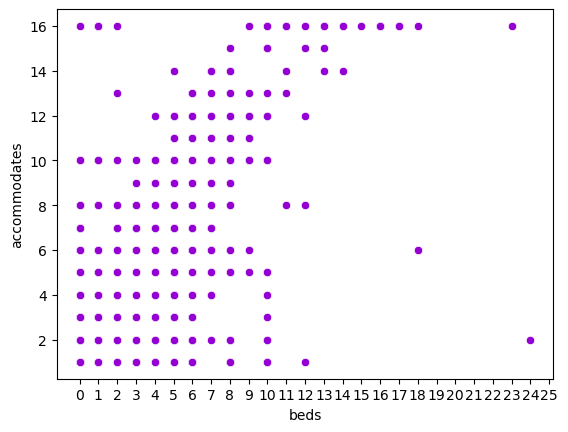

In [50]:
sns.scatterplot(data=listings_det, x='beds', y='accommodates', color='darkviolet')
plt.xticks(range(0,26));

In [51]:
# Comprobamos la relación entre el número de camas y el número de personas que se pueden alojar
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.00,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.00,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.00,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.00,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.00,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.00,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.00,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.00,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.00,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


Leyendo la matriz podríamos realizar una asignación más o menos directa de la siguiente manera:
- 1–2 persona → normalmente **1 bed**
- 3–4 persona → normalmente **2 beds**
- 5–6 persona → normalmente **3 beds**
- Más de 6 → normalmente **4 beds**


In [52]:
# Revisamos los valores de la variable beds
listings_det.beds.value_counts(dropna=False)

beds
1.00     8751
2.00     4805
3.00     2272
4.00     1186
0.00      628
5.00      466
NaN       341
6.00      222
7.00       78
8.00       68
10.00      39
9.00       20
11.00       6
14.00       6
16.00       5
12.00       5
13.00       4
18.00       2
17.00       2
15.00       1
23.00       1
24.00       1
Name: count, dtype: int64

In [53]:
# Función para imputar valores nulos en la variable beds
def imputar_nulos(registro):
    #Lista de condiciones en funcion de numero de húespedes que se puede alojar
    condiciones = [(registro.accommodates <=2),
                     (registro.accommodates >2) & (registro.accommodates <=4),
                     (registro.accommodates >4) & (registro.accommodates <=6),
                     (registro.accommodates >6)]
    # Números de camas correspondientes a cada condición
    resultados = [1,2,3,4]
    
    # Devuelve el valor imputado según las condiciones
    return np.select(condiciones, resultados, default= -999)

In [54]:
#listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis=1).astype('float')

In [55]:
# Asignamos los valores imputados a los nulos de la variable beds
listings_det.loc[listings_det.beds.isna(), 'beds'] = listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis=1).astype('float')

In [56]:
# Chequeamos que no quedan nulos en la variable beds
listings_det.beds.value_counts(dropna=False)

beds
1.00     9061
2.00     4828
3.00     2276
4.00     1190
0.00      628
5.00      466
6.00      222
7.00       78
8.00       68
10.00      39
9.00       20
11.00       6
14.00       6
16.00       5
12.00       5
13.00       4
18.00       2
17.00       2
15.00       1
23.00       1
24.00       1
Name: count, dtype: int64

- Ahora podemos realiar la imputación de `bedrooms`

#### `bedrooms`

Tenemos que evaluar si hacemos la imputación mediante:
 - `bedrooms`- `accommodates` 
 - `bedrooms`- `beds`

In [57]:
pd.crosstab(listings_det.bedrooms, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
1.00,3009,5569,1141,2265,111,81,4,14,0,7,0,0,0,0,0,11
2.00,74,173,348,1560,444,852,51,48,4,6,1,0,0,1,0,0
3.00,21,22,45,104,220,509,106,158,7,20,4,13,1,2,1,0
4.00,16,21,1,12,18,38,34,96,10,39,2,15,5,2,0,2
5.00,9,6,0,0,4,3,4,6,9,34,3,8,1,3,3,12
6.00,3,3,0,0,0,1,0,1,3,4,2,1,1,1,2,2
7.00,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,6
8.00,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,4
9.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2


In [58]:
pd.crosstab(listings_det.bedrooms, listings_det.beds)

beds,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,23.00,24.00
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.00,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.00,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.00,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.00,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.00,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.00,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.00,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.00,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.00,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


La relación `bedrooms`- `beds` parece mucho más coherente y muestra un patrón algo más claro. Basándonos en la distribución observada, podemos deducir la siguiente lógica:
- 0, 1, o 2 beds → corresponde a **1 bedroom**
- 3 o 4 beds → corresponde a **2 bedrooms**
- 5 o 6 beds → corresponde a **3 bedrooms**
- Más de 6 beds → corresponde a **4 bedrooms**

In [59]:
# Función para imputar valores nulos en la variable bedrooms
def impute_bedrooms(row):
    #Lista de condiciones en funcion de numero de camas
    condiciones = [(row.beds <= 2),
                     (row.beds > 2) & (row.beds <= 4),
                     (row.beds > 4) & (row.beds <= 6),
                     (row.beds > 6)]
    # Números de habitaciones correspondientes a cada condición
    resultados = [1,2,3,4]
    
    # Devuelve el valor imputado según las condiciones
    return np.select(condiciones, resultados, default= -999)

In [60]:
# Comprobamos los valores imputados para los nulos en bedrooms
listings_det.bedrooms.value_counts(dropna=False)

bedrooms
1.00     12212
2.00      3562
NaN       1434
3.00      1233
4.00       311
5.00       105
6.00        24
7.00        11
8.00         7
9.00         3
10.00        3
14.00        2
15.00        1
18.00        1
Name: count, dtype: int64

In [61]:
#listings_det.loc[listings_det.bedrooms.isna()].apply(impute_bedrooms, axis=1)

In [62]:
listings_det.loc[listings_det.bedrooms.isna(), 'bedrooms'] = listings_det.loc[listings_det.bedrooms.isna()].apply(impute_bedrooms, axis=1).astype('float')

In [63]:
# Comprobamos que no quedan nulos en la variable bedrooms
listings_det.bedrooms.value_counts(dropna=False)

bedrooms
1.00     13540
2.00      3657
3.00      1244
4.00       311
5.00       105
6.00        24
7.00        11
8.00         7
9.00         3
10.00        3
14.00        2
15.00        1
18.00        1
Name: count, dtype: int64

#### `bathrooms`

Eliminamos esta variable dado que todos sus registros son nulos

In [64]:
listings_det.drop(columns='bathrooms', inplace=True)
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     18909 non-null  float64 
 5   beds                         18909 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


### Análisis de duplicados

In [65]:
# Comprobamos si hay registros duplicados
listings_det.duplicated().sum()

np.int64(0)

### Análisis de variables categóricas

In [66]:
listings_det.host_is_superhost.value_counts()

host_is_superhost
f    15423
t     3460
Name: count, dtype: int64

### Análisis de variables numéricas

In [67]:
listings_det.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18909.00,30558406.20,14488888.26,6369.00,19305558.00,33537761.00,42555334.00,52182334.00
accommodates,18909.00,3.09,1.96,0.00,2.00,2.00,4.00,16.00
bedrooms,18909.00,1.41,0.81,1.00,1.00,1.00,2.00,18.00
beds,18909.00,1.91,1.44,0.00,1.00,1.00,2.00,24.00
number_of_reviews,18909.00,32.71,65.25,0.00,0.00,5.00,32.00,744.00
review_scores_rating,13877.00,4.55,0.78,0.00,4.50,4.75,4.94,5.00
review_scores_communication,13640.00,4.78,0.46,1.00,4.75,4.92,5.00,5.00
review_scores_location,13637.00,4.79,0.38,1.00,4.73,4.92,5.00,5.00


No se detecta niguna nomalía

**En este punto ya hemos detectado y corregido los principales problemas de calidad de datos así que pasamos a crear el datamart analítico integrando nuestras tablas.**

# DATAMART ANALITICO

Tenemos 2 tablas principales:

- `listings`
- `listings_det`
Y sabemos que ambas comparten el campo id, por tanto podemos cruzarlas por él.

La tabla principal es listings, ya que la de detalle lo que hace es darnos datos adicionales.

Por tanto la tabla que ha de mandar en la integración es listings.

Además tambien tenemos la tabla del precio, que en este caso cruza conceptualmente con listings a través del distrito (`neighbourhood_group`).

In [68]:
print(listings.shape)
print(listings_det.shape)

(17710, 12)
(18909, 10)


In [69]:
df =pd.merge(left=listings, right=listings_det, on='id', how='left')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              17710 non-null  int64   
 1   name                            17707 non-null  object  
 2   host_id                         17710 non-null  int64   
 3   neighbourhood_group             17710 non-null  category
 4   neighbourhood                   17710 non-null  category
 5   latitude                        17710 non-null  float64 
 6   longitude                       17710 non-null  float64 
 7   room_type                       17710 non-null  category
 8   price                           17710 non-null  int64   
 9   minimum_nights                  17710 non-null  int64   
 10  calculated_host_listings_count  17710 non-null  int64   
 11  availability_365                17710 non-null  int64   
 12  description       

Ahora vamos a ver cómo podemos incorporar la información externa del precio por metro cuadrado.

Para ello lo primero es analizar los valores de la `neighbourhood_group` distrito en ambas tablas, ya que necesitan coincidir para que podamos cruzarlos.

En df la variable es categórica, así que para sacar los niveles tenemos que usar .categories

In [71]:
df.neighbourhood_group.cat.categories

Index(['Arganzuela', 'Barajas', 'Carabanchel', 'Centro', 'Chamartín',
       'Chamberí', 'Ciudad Lineal', 'Fuencarral - El Pardo', 'Hortaleza',
       'Latina', 'Moncloa - Aravaca', 'Moratalaz', 'Puente de Vallecas',
       'Retiro', 'Salamanca', 'San Blas - Canillejas', 'Tetuán', 'Usera',
       'Vicálvaro', 'Villa de Vallecas', 'Villaverde'],
      dtype='object')

In [72]:
pd.Series(df.neighbourhood_group.cat.categories)

0                Arganzuela
1                   Barajas
2               Carabanchel
3                    Centro
4                 Chamartín
5                  Chamberí
6             Ciudad Lineal
7     Fuencarral - El Pardo
8                 Hortaleza
9                    Latina
10        Moncloa - Aravaca
11                Moratalaz
12       Puente de Vallecas
13                   Retiro
14                Salamanca
15    San Blas - Canillejas
16                   Tetuán
17                    Usera
18                Vicálvaro
19        Villa de Vallecas
20               Villaverde
dtype: object

In [73]:
precio_m2.distrito

1             Arganzuela
2                Barajas
3            Carabanchel
4                 Centro
5              Chamartín
6               Chamberí
7          Ciudad Lineal
8             Fuencarral
9              Hortaleza
10                Latina
11               Moncloa
12             Moratalaz
13    Puente de Vallecas
14                Retiro
15             Salamanca
16              San Blas
17                Tetuán
18                 Usera
19             Vicálvaro
20     Villa de Vallecas
21            Villaverde
Name: distrito, dtype: object

Comparando parece todo igual excepto:

* Fuencarral - El Pardo
* Moncloa - Aravaca
* San Blas - Canillejas

Por tanto vamos a reemplazar estos valores en precio_m2 para que sean iguales a los de df y podamos cruzarlos

In [80]:
reemplazar = {'Fuencarral':'Fuencarral - El Pardo',
              'Moncloa':'Moncloa - Aravaca',
              'San Blas':'San Blas - Canillejas'}

precio_m2.distrito = precio_m2.distrito.replace(reemplazar)

# Otra forma de hacerlo con .map()
# precio_m2.distrito.map(reemplazar).fillna(precio_m2.distrito)

Una vez realizado el reemplazo ya se puede añadir la información de precio_m2

In [84]:
df = pd.merge(left=df, right=precio_m2, how='left', left_on='neighbourhood_group', right_on='distrito')
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.46,-3.68,Private room,60,1,...,t,2,1.00,1.00,80,4.87,4.89,4.77,5098.00,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40,-3.74,Private room,31,4,...,f,1,1.00,1.00,33,4.58,4.82,4.21,2267.00,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.39,-3.70,Entire home/apt,50,15,...,f,6,3.00,5.00,0,NaN,NaN,NaN,4085.00,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42,-3.71,Entire home/apt,92,5,...,f,3,1.00,1.00,12,4.92,5.00,5.00,4827.00,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.39,-3.69,Private room,26,2,...,f,1,1.00,1.00,149,4.68,4.71,4.70,4085.00,Arganzuela


In [87]:
# Comprobamos que no hay nulos en la variable precio_m2 tras la unión
df.precio_m2.isna().sum()

np.int64(0)

## Guardar en la base de datos

In [88]:
df.to_sql('df', con=con, if_exists='replace')

17710

In [90]:
# Inspección de tablas en la base de datos, para comprobar que se ha guardado correctamente
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['df', 'listings', 'listings_det']